In [13]:
from sklearn import metrics
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import random

# to avoid warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# generates dataset of random numbers

# gen 50 numbers with X and Y cords, first range gen X and Y cords
data_1 = np.array([[np.random.randint(1, 400) for i in range(2)] for j in range(50)], dtype = np.float64)

data_2 = np.array([[np.random.randint(300, 700) for i in range(2)] for j in range(50)], dtype = np.float64)

data_3 = np.array([[np.random.randint(600, 900) for i in range(2)] for j in range(50)], dtype = np.float64)

data = np.append(np.append(data_1, data_2, axis = 0), data_3, axis = 0)

In [5]:
data.shape

(150, 2)

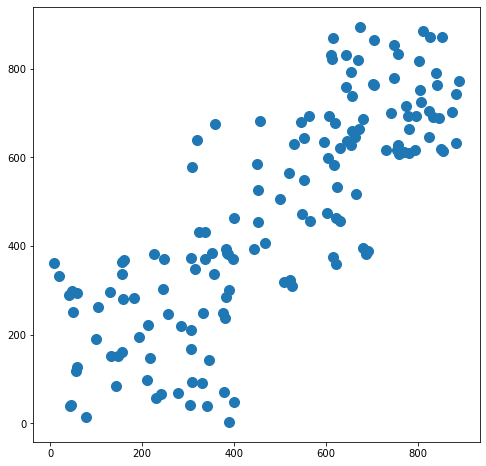

In [6]:
# viz data
fig, ax = plt.subplots(figsize = (8, 8))
plt.scatter(data[:, 0], data[:, 1], s = 100)

In [9]:
# labels for our datapoints
labels_1 = np.array([0 for i in range(50)])  # for data_1

labels_2 = np.array([1 for i in range(50)])  # for data_2

labels_3 = np.array([2 for i in range(50)])  # for data_3

labels = np.append(np.append(labels_1, labels_2, axis = 0), labels_3, axis = 0)

In [10]:
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [11]:
# creates dataFrame since easier to work with that, for data wranggline or viz
df = pd.DataFrame({"data_x": data[:,0], "data_y": data[:, 1], "labels": labels})

df.sample(10)

,data_x,data_y,labels
90,453.0,526.0,1
137,657.0,739.0,2
108,891.0,772.0,2
129,847.0,689.0,2
27,306.0,211.0,0
85,401.0,464.0,1
18,240.0,66.0,0
31,342.0,40.0,0
149,840.0,791.0,2
11,100.0,191.0,0


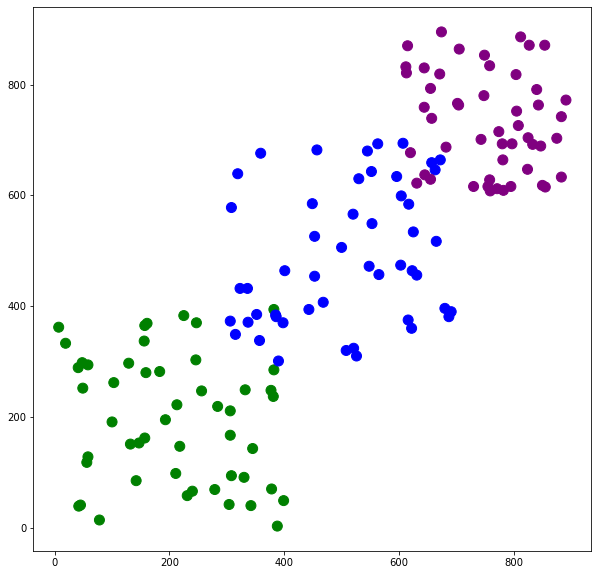

In [14]:
# viz data points but with color based on labels data falls under
colors = ["green", "blue", "purple"]

plt.figure(figsize=(10, 10))

plt.scatter(df["data_x"], df["data_y"], c= df["labels"], s = 100,
           cmap = matplotlib.colors.ListedColormap(colors))

In [15]:
# kmeans model
kmeans_model = KMeans(n_clusters=3, max_iter = 10000).fit(data)

In [17]:
kmeans_model.labels_

array([2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [18]:
# gets the cluster centroids of the 3 clusters created by model
centroids = kmeans_model.cluster_centers_

centroids

array([[470.92682927, 443.02439024],
       [729.6557377 , 713.8852459 ],
       [199.29166667, 190.0625    ]])

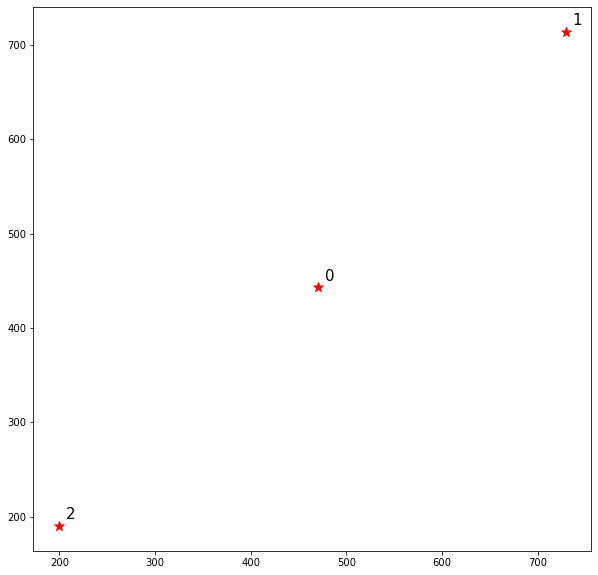

In [19]:
# viz where cluster centers are
fig, ax = plt.subplots(figsize = (10, 10))

plt.scatter(centroids[:,0], centroids[:,1], c='r', s= 100, marker="*")

for i in range(len(centroids)):
    plt.annotate(i, (centroids[i][0] + 7, centroids[i][1] + 7), fontsize = 15)

***
**Cluster Model eval**

In [21]:
print(f"Homogenity score: {metrics.homogeneity_score(labels, kmeans_model.labels_)}")

print(f"Completeness score: {metrics.completeness_score(labels, kmeans_model.labels_)}")

print(f"V_measure score: {metrics.v_measure_score(labels, kmeans_model.labels_)}")

print(f"Adjusted Rand Score: {metrics.adjusted_rand_score(labels, kmeans_model.labels_)}")

print(f"Adjusted_mutual_info score: {metrics.adjusted_mutual_info_score(labels, kmeans_model.labels_)}")

# doesn't req actual label
print(f"Silhouette score: {metrics.silhouette_score(data, kmeans_model.labels_)}")

Homogenity score: 0.7768301945012906
Completeness score: 0.7865381119440588
V_measure score: 0.7816540120010933
Adjusted Rand Score: 0.7679212377389893
Adjusted_mutual_info score: 0.7789025893580815
Silhouette score: 0.4721297380878822


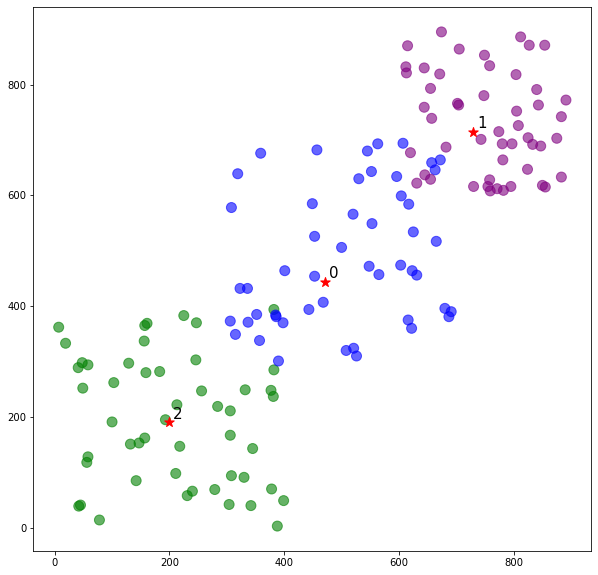

In [26]:
# viz how this clustering turn out
colors = ["green", "blue", "purple"]

plt.figure(figsize=(10, 10))

plt.scatter(df["data_x"], df["data_y"], c= df["labels"], s = 100,
           cmap = matplotlib.colors.ListedColormap(colors), alpha = 0.6)


# does work to identify centroids and annot
plt.scatter(centroids[:,0], centroids[:,1], c='r', s= 100, marker="*")
for i in range(len(centroids)):
    plt.annotate(i, (centroids[i][0] + 7, centroids[i][1] + 7), fontsize = 15)

In [29]:
# prediciton (to predict cluster point belongs to)
data_test = np.array([
    [442., 621.],[50., 153.],
    [333., 373.], [835., 816.]
])

label_pred = kmeans_model.predict(data_test)

label_pred

array([0, 2, 0, 1])

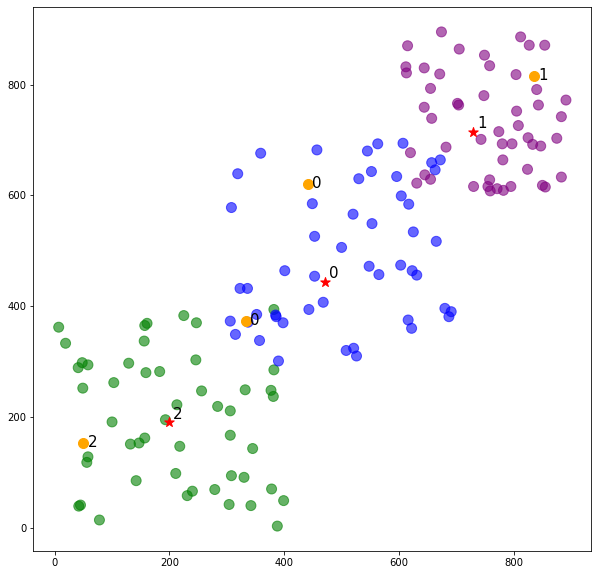

In [32]:
# plot test data point to see cluster it belongs to
colors = ["green", "blue", "purple"]

plt.figure(figsize=(10, 10))

plt.scatter(df["data_x"], df["data_y"], c= df["labels"], s = 100,
           cmap = matplotlib.colors.ListedColormap(colors), alpha = 0.6)

# plots test dataPoint
plt.scatter(data_test[:,0], data_test[:,1], c="orange", s= 100, marker="o")
for i in range(len(label_pred)):
    plt.annotate(label_pred[i], (data_test[i][0] + 7, data_test[i][1] - 7), fontsize =15)


# does work to identify centroids and annot
plt.scatter(centroids[:,0], centroids[:,1], c='r', s= 100, marker="*")
for i in range(len(centroids)):
    plt.annotate(i, (centroids[i][0] + 7, centroids[i][1] + 7), fontsize = 15)

***
**KMeans Clustering Iris Dataset**

In [35]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

from sklearn import metrics
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings("ignore")

In [55]:
iris_df = pd.read_csv("./datasets/iris.csv", skiprows = 1,
                     names = ["sepal-length", "sepal-width",
                             "petal-length", "petal-width", "class"])

iris_df.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [56]:
# shuffles dataframe
iris_df = iris_df.sample(frac=1).reset_index(drop = True)
iris_df.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,6.8,3.0,5.5,2.1,Iris-virginica
1,4.4,3.2,1.3,0.2,Iris-setosa
2,5.0,3.4,1.6,0.4,Iris-setosa
3,5.0,3.4,1.5,0.2,Iris-setosa
4,5.6,2.8,4.9,2.0,Iris-virginica


In [57]:
# gets class cat
iris_df["class"].unique()

array(['Iris-virginica', 'Iris-setosa', 'Iris-versicolor'], dtype=object)

In [58]:
# encode cat
from sklearn import preprocessing

label_encoding = preprocessing.LabelEncoder()
iris_df["class"] = label_encoding.fit_transform(iris_df["class"].astype(str))
iris_df.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,6.8,3.0,5.5,2.1,2
1,4.4,3.2,1.3,0.2,0
2,5.0,3.4,1.6,0.4,0
3,5.0,3.4,1.5,0.2,0
4,5.6,2.8,4.9,2.0,2


In [59]:
label_encoding.classes_

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

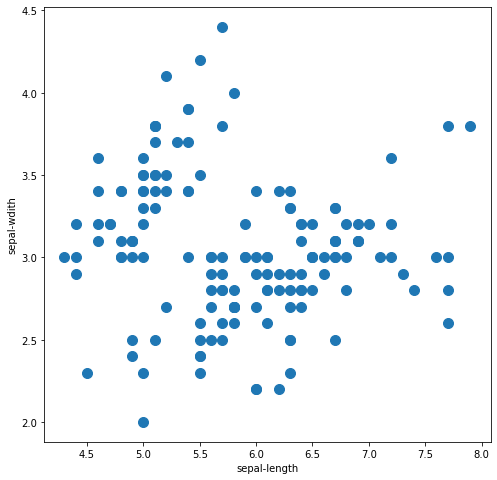

In [60]:
# viz dataset
fig, ax = plt.subplots(figsize = (8, 8))
plt.scatter(iris_df["sepal-length"], iris_df["sepal-width"], s= 100)

plt.xlabel("sepal-length")
plt.ylabel("sepal-wdith")
plt.show();

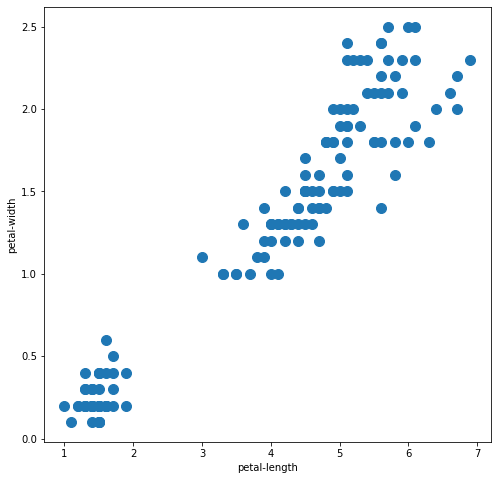

In [61]:
# viz dataset
fig, ax = plt.subplots(figsize = (8, 8))
plt.scatter(iris_df["petal-length"], iris_df["petal-width"], s= 100)

plt.xlabel("petal-length")
plt.ylabel("petal-width")
plt.show();

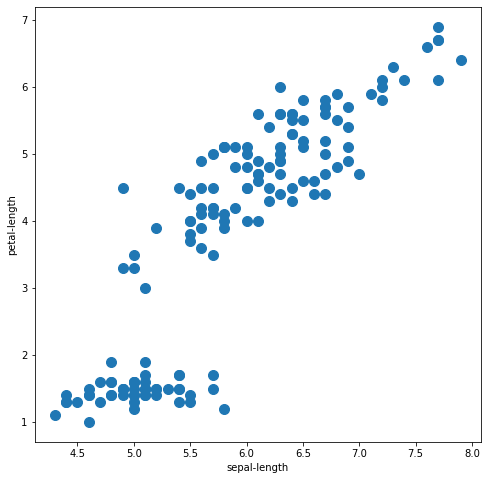

In [62]:
# viz dataset
fig, ax = plt.subplots(figsize = (8, 8))
plt.scatter(iris_df["sepal-length"], iris_df["petal-length"], s= 100)

plt.xlabel("sepal-length")
plt.ylabel("petal-length")
plt.show();

**clustering on just two features first**

In [63]:
iris_2D = iris_df[["sepal-length", "petal-length"]]

iris_2D.sample(5)

,sepal-length,petal-length
135,6.9,5.1
145,5.8,5.1
48,5.9,4.2
66,5.5,4.0
42,4.8,1.9


In [64]:
# conv to np array to feed to model
iris_2D = np.array(iris_2D)

kmeans_model_2D = KMeans(n_clusters = 3, max_iter=1000).fit(iris_2D)

In [66]:
kmeans_model_2D.labels_

array([2, 0, 0, 0, 1, 1, 1, 2, 0, 2, 2, 1, 0, 0, 1, 1, 2, 0, 2, 1, 1, 2,
       1, 0, 0, 2, 1, 2, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 1, 2, 1, 0, 2,
       2, 0, 1, 0, 1, 0, 0, 1, 2, 0, 1, 1, 0, 0, 0, 1, 1, 2, 0, 0, 0, 1,
       1, 0, 1, 2, 2, 0, 1, 1, 2, 2, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 2, 0,
       1, 2, 0, 0, 0, 1, 0, 2, 1, 0, 2, 1, 0, 1, 2, 1, 0, 2, 2, 1, 1, 1,
       1, 0, 1, 1, 2, 0, 0, 0, 0, 2, 0, 2, 2, 1, 1, 2, 1, 2, 2, 2, 2, 1,
       1, 0, 2, 2, 0, 2, 0, 1, 1, 0, 2, 1, 1, 1, 1, 1, 2, 1])

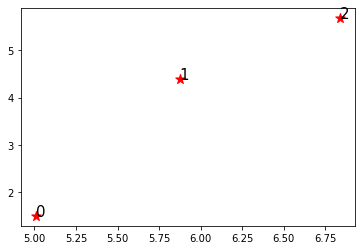

In [69]:
# plot cluster centers
centroids_2D = kmeans_model_2D.cluster_centers_

# does work to identify centroids and annot
plt.scatter(centroids_2D[:,0], centroids_2D[:,1], c='r', s= 100, marker="*")
for i in range(len(centroids_2D)):
    plt.annotate(i, (centroids_2D[i][0], centroids_2D[i][1]), fontsize = 15)

In [71]:
# eval clustering
iris_labels = iris_df["class"]

print(f"Homogenity score: {metrics.homogeneity_score(iris_labels, kmeans_model_2D.labels_)}")

print(f"Completeness score: {metrics.completeness_score(iris_labels, kmeans_model_2D.labels_)}")

print(f"V_measure score: {metrics.v_measure_score(iris_labels, kmeans_model_2D.labels_)}")

print(f"Adjusted Rand Score: {metrics.adjusted_rand_score(iris_labels, kmeans_model_2D.labels_)}")

print(f"Adjusted_mutual_info score: {metrics.adjusted_mutual_info_score(iris_labels, kmeans_model_2D.labels_)}")

# doesn't req actual label
print(f"Silhouette score: {metrics.silhouette_score(iris_2D, kmeans_model_2D.labels_)}")

Homogenity score: 0.7033177646052958
Completeness score: 0.7096993707802843
V_measure score: 0.706494157075837
Adjusted Rand Score: 0.6988627672348092
Adjusted_mutual_info score: 0.702802453140913
Silhouette score: 0.5890612474062568


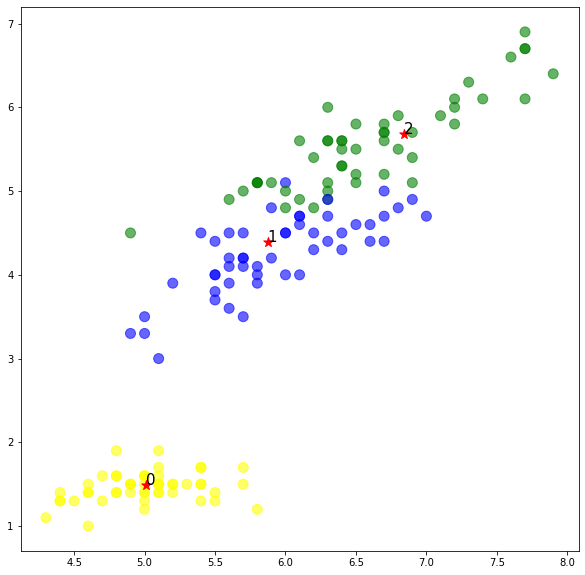

In [73]:
# viz how this clustering turn out
colors = ["yellow", "blue", "green"]

plt.figure(figsize=(10, 10))

plt.scatter(iris_df["sepal-length"], iris_df["petal-length"], c= iris_df["class"], s = 100,
           cmap = matplotlib.colors.ListedColormap(colors), alpha = 0.6)


# does work to identify centroids and annot
plt.scatter(centroids_2D[:,0], centroids_2D[:,1], c='r', s= 100, marker="*")
for i in range(len(centroids_2D)):
    plt.annotate(i, (centroids_2D[i][0], centroids_2D[i][1]), fontsize = 15)

**Clustering using all features**

In [74]:
iris_features = iris_df.drop("class", axis = 1)
iris_features.head()

,sepal-length,sepal-width,petal-length,petal-width
0,6.8,3.0,5.5,2.1
1,4.4,3.2,1.3,0.2
2,5.0,3.4,1.6,0.4
3,5.0,3.4,1.5,0.2
4,5.6,2.8,4.9,2.0


In [75]:
# get target
iris_labels = iris_df["class"]

In [80]:
kmeans_model = KMeans(n_clusters = 3).fit(iris_features)

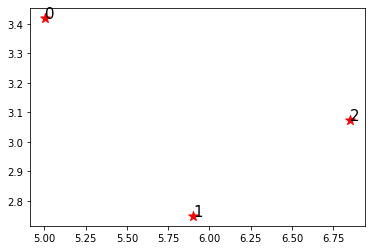

In [81]:
# plot cluster centers
centroids = kmeans_model.cluster_centers_

# does work to identify centroids and annot
plt.scatter(centroids[:,0], centroids[:,1], c='r', s= 100, marker="*")
for i in range(len(centroids)):
    plt.annotate(i, (centroids[i][0], centroids[i][1]), fontsize = 15)

In [83]:
# eval clustering
print(f"Homogenity score: {metrics.homogeneity_score(iris_labels, kmeans_model.labels_)}")

print(f"Completeness score: {metrics.completeness_score(iris_labels, kmeans_model.labels_)}")

print(f"V_measure score: {metrics.v_measure_score(iris_labels, kmeans_model.labels_)}")

print(f"Adjusted Rand Score: {metrics.adjusted_rand_score(iris_labels, kmeans_model.labels_)}")

print(f"Adjusted_mutual_info score: {metrics.adjusted_mutual_info_score(iris_labels, kmeans_model.labels_)}")

# doesn't req actual label
print(f"Silhouette score: {metrics.silhouette_score(iris_features, kmeans_model.labels_)}")

Homogenity score: 0.7514854021988338
Completeness score: 0.7649861514489815
V_measure score: 0.7581756800057784
Adjusted Rand Score: 0.7302382722834697
Adjusted_mutual_info score: 0.7551191675800484
Silhouette score: 0.5525919445499756
